<a href="https://colab.research.google.com/github/touhid-sovon/machine_learning/blob/main/Salaes_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading and Creating dataframe the dataset from Kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kyanyoga/sample-sales-data")

print("Path to dataset files:", path)

100%|██████████| 77.5k/77.5k [00:00<00:00, 16.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1


In [3]:
!ls /root/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1

sales_data_sample.csv


In [4]:
df = pd.read_csv(path+'/sales_data_sample.csv',encoding='unicode_escape')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Basic Data Exploration

In [5]:
# check the shape
df.shape # return a tuple that give us the row and column number

(2823, 25)

In [6]:
# checking the column names
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [7]:
# checking the data types
df.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,object
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


In [8]:
# summary statistics
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [9]:
# generating summary of object data types
df.describe(include='object')

,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823,2823,2823,2823,2823,2823,2823,302,2823,1337,2747,2823,1749,2823,2823,2823
unique,252,6,7,109,92,91,92,9,73,16,73,19,3,77,72,3
top,11/14/2003 0:00,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,USA,EMEA,Freyre,Diego,Medium
freq,38,2617,967,52,259,259,259,55,304,416,259,1004,1407,259,259,1384


In [10]:
# counting the null values
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [11]:
# checking the duplicates
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


# Data Cleaning

In [13]:
# Adress line 2 has fewer data . SO we can delete the entire column
df = df.drop('ADDRESSLINE2',axis=1)

In [14]:
# remove duplicates
df = df.drop_duplicates()

In [15]:
# working with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  CITY              2823 non-null   object 


In [16]:
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


# Basic Data Manipulation

In [17]:
pd.set_option('display.max_columns',None)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [18]:
df.shape

(2823, 24)

In [19]:
df['SALES'].head()

,SALES
0,2871.00
1,2765.90
2,3884.34
3,3746.70
4,5205.27


In [20]:
# sales accordinf country
sales_by_country = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
sales_by_country

,SALES
COUNTRY,
USA,3627982.83
Spain,1215686.92
France,1110916.52
Australia,630623.10
UK,478880.46
Italy,374674.31
Finland,329581.91
Norway,307463.70
Singapore,288488.41


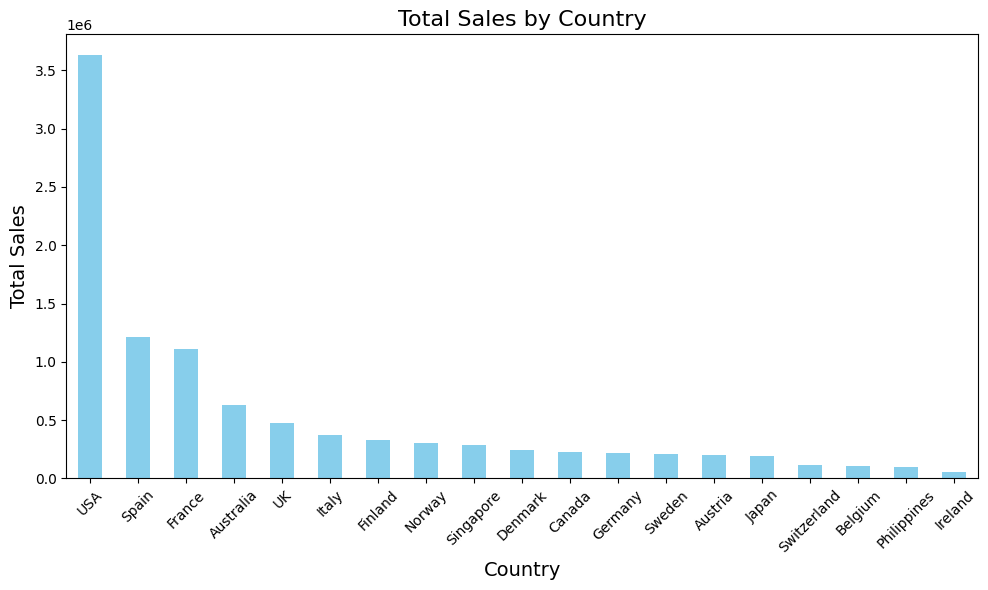

In [21]:
# Create a bar plot using matplotlib
plt.figure(figsize=(10, 6))  # Set the figure size
sales_by_country.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Total Sales by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
isinstance(sales_by_country,pd.Series)

True

In [23]:
# converting a series to dataframe
sales_by_country = sales_by_country.to_frame()
sales_by_country

,SALES
COUNTRY,
USA,3627982.83
Spain,1215686.92
France,1110916.52
Australia,630623.10
UK,478880.46
Italy,374674.31
Finland,329581.91
Norway,307463.70
Singapore,288488.41


<ipython-input-24-7cd9186b6511>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='SALES', data=sales_by_country, palette='viridis')


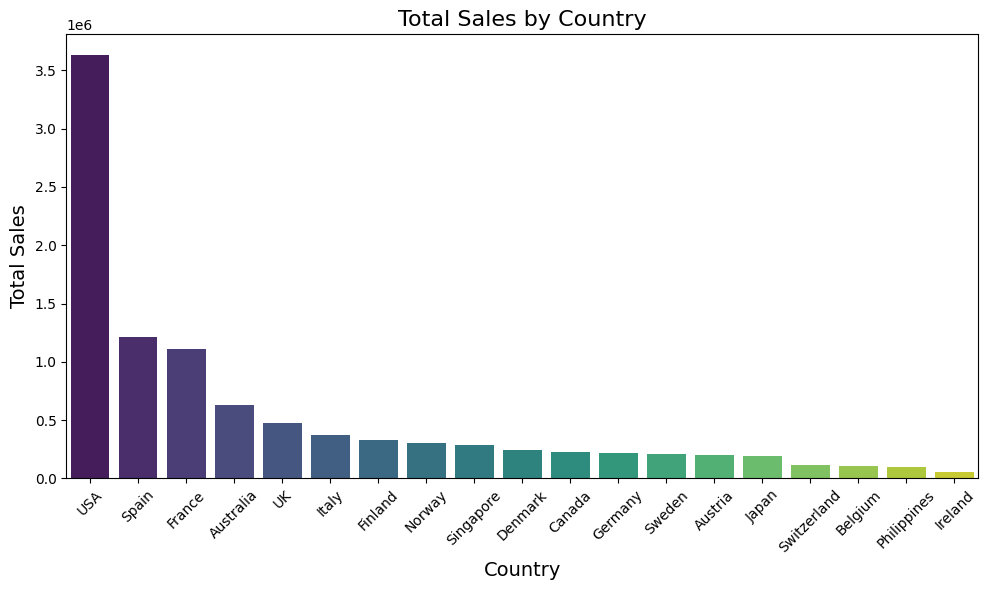

In [24]:
# plotting the data using seaborn
# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='COUNTRY', y='SALES', data=sales_by_country, palette='viridis')

# Add titles and labels
plt.title('Total Sales by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
# number of customer
df['CUSTOMERNAME'].value_counts().sum()

2823

In [26]:
# number of unique customers
df['CUSTOMERNAME'].nunique()

92

In [27]:
# finding the customer with the most purchase
df['CUSTOMERNAME'].value_counts()



,count
CUSTOMERNAME,
Euro Shopping Channel,259
Mini Gifts Distributors Ltd.,180
"Australian Collectors, Co.",55
La Rochelle Gifts,53
"AV Stores, Co.",51
...,...
Microscale Inc.,10
Royale Belge,8
Auto-Moto Classics Inc.,8


In [28]:
# customer by country
df_customer_by_country = df.groupby('COUNTRY')['CUSTOMERNAME'].nunique().sort_values(ascending=False).reset_index()
df_customer_by_country.rename(columns = {'CUSTOMERNAME':'NUMBER OF UNIQUE CUSTOMER'},inplace=True)
df_customer_by_country

,COUNTRY,NUMBER OF UNIQUE CUSTOMER
0,USA,35
1,France,12
2,UK,5
3,Spain,5
4,Australia,5
5,Finland,3
6,Germany,3
7,Norway,3
8,Canada,3
9,Italy,3


In [29]:
isinstance(df_customer_by_country,pd.Series)

False

In [30]:
# targeting top 10 customer by Sales
df_customer_by_sales = df.groupby('CUSTOMERNAME')['SALES'].sum().reset_index().sort_values(ascending = False,by='SALES')
df_customer_by_sales.head(10)

,CUSTOMERNAME,SALES
33,Euro Shopping Channel,912294.11
55,Mini Gifts Distributors Ltd.,654858.06
6,"Australian Collectors, Co.",200995.41
58,Muscle Machine Inc,197736.94
44,La Rochelle Gifts,180124.90
31,"Dragon Souveniers, Ltd.",172989.68
45,Land of Toys Inc.,164069.44
81,The Sharp Gifts Warehouse,160010.27
0,"AV Stores, Co.",157807.81
3,"Anna's Decorations, Ltd",153996.13


<ipython-input-31-ab18993ec0aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SALES', y='CUSTOMERNAME', data=df_customer_by_sales.head(10), palette='viridis')


Text(0.5, 1.0, 'Top 10 Customers by Sales')

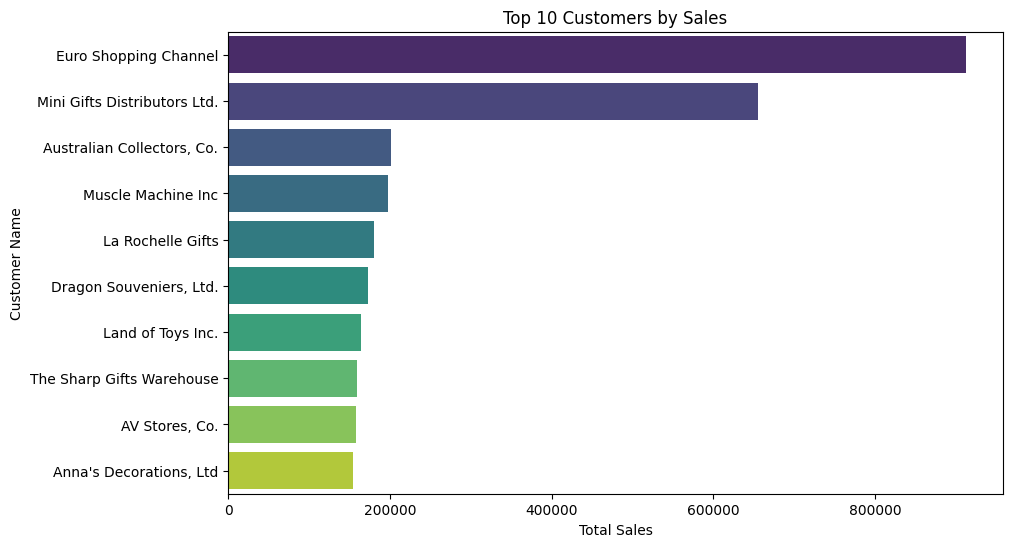

In [31]:
# plotting the data
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='SALES', y='CUSTOMERNAME', data=df_customer_by_sales.head(10), palette='viridis')
plt.xlabel("Total Sales")
plt.ylabel("Customer Name")
plt.title("Top 10 Customers by Sales")

In [32]:
df_sale_by_contry = df.groupby('COUNTRY')['SALES'].sum().reset_index().sort_values(ascending=False,by='SALES')
df_sale_by_contry.head(10)

,COUNTRY,SALES
18,USA,3627982.83
14,Spain,1215686.92
6,France,1110916.52
0,Australia,630623.10
17,UK,478880.46
9,Italy,374674.31
5,Finland,329581.91
11,Norway,307463.70
13,Singapore,288488.41
4,Denmark,245637.15


<ipython-input-33-6cc6bbf3983e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SALES', y='COUNTRY', data=df_sale_by_contry.head(10), palette='viridis')


<Axes: xlabel='SALES', ylabel='COUNTRY'>

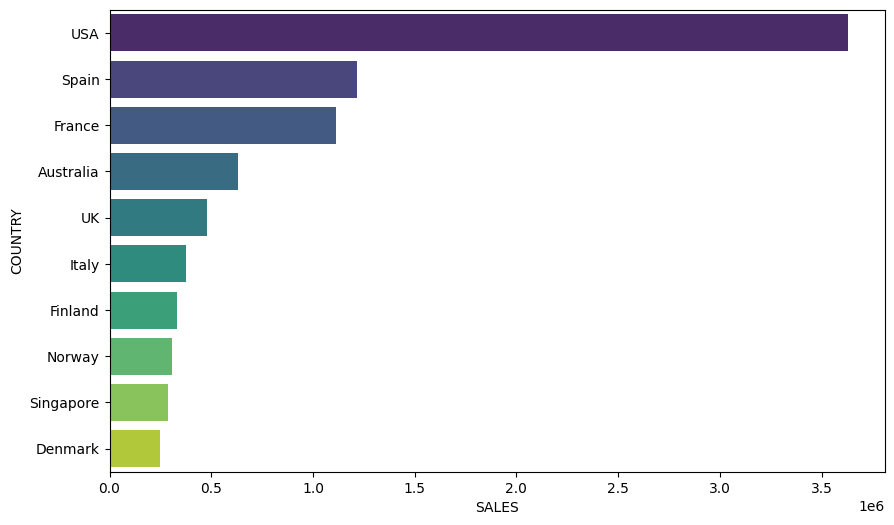

In [33]:
# plotting the data
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='SALES', y='COUNTRY', data=df_sale_by_contry.head(10), palette='viridis')

In [34]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [35]:
df['PRODUCTLINE'].value_counts()

,count
PRODUCTLINE,
Classic Cars,967
Vintage Cars,607
Motorcycles,331
Planes,306
Trucks and Buses,301
Ships,234
Trains,77


In [36]:
# Per Year sale Products
df_year_product = df.groupby(['YEAR_ID','PRODUCTLINE'])['SALES'].sum().reset_index()
df_year_product

,YEAR_ID,PRODUCTLINE,SALES
0,2003,Classic Cars,1484785.29
1,2003,Motorcycles,370895.58
2,2003,Planes,272257.60
3,2003,Ships,244821.09
4,2003,Trains,72802.29
5,2003,Trucks and Buses,420429.93
6,2003,Vintage Cars,650987.76
7,2004,Classic Cars,1762257.09
8,2004,Motorcycles,560545.23
9,2004,Planes,502671.80


<ipython-input-38-be90b970445c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YEAR_ID', y='SALES', data=df_year_product, palette='viridis')


Text(0, 0.5, 'Sales')

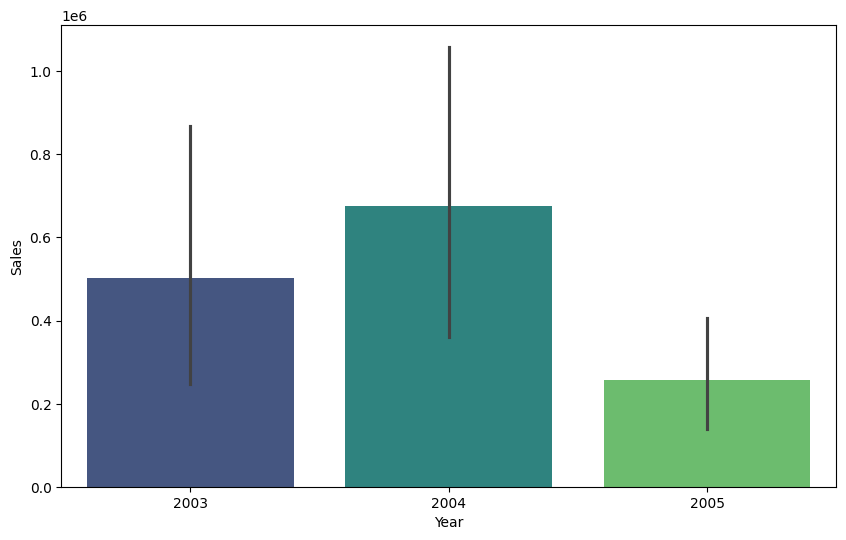

In [38]:
# plotting the sale
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='YEAR_ID', y='SALES', data=df_year_product, palette='viridis')
plt.xlabel("Year")
plt.ylabel("Sales")
